In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\externals\joblib\__init__.py:15: DeprecationWarning: sklearn.externals.joblib is deprecated in 0.21 and will be removed in 0.23. Please import this functionality directly from joblib, which can be installed with: pip install joblib. If this warning is raised when loading pickled models, you may need to re-serialize those models with scikit-learn 0.21+.
  warnings.warn(msg, category=DeprecationWarning)


In [2]:
df=pd.read_csv('happiness.csv')
pd.set_option('display.max_columns',None)

In [3]:
df.head()

,Country,Region,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,Switzerland,Western Europe,1,7.587,0.03411,1.39651,1.34951,0.94143,0.66557,0.41978,0.29678,2.51738
1,Iceland,Western Europe,2,7.561,0.04884,1.30232,1.40223,0.94784,0.62877,0.14145,0.43630,2.70201
2,Denmark,Western Europe,3,7.527,0.03328,1.32548,1.36058,0.87464,0.64938,0.48357,0.34139,2.49204
3,Norway,Western Europe,4,7.522,0.03880,1.45900,1.33095,0.88521,0.66973,0.36503,0.34699,2.46531
4,Canada,North America,5,7.427,0.03553,1.32629,1.32261,0.90563,0.63297,0.32957,0.45811,2.45176


# EDA by sweetviz library

In [4]:
import sweetviz

In [5]:
my_report=sweetviz.analyze([df,'df'],target_feat='Happiness Score')

:FEATURES DONE:                    |█████████████████████| [100%]   00:17  -> (00:00 left)
:PAIRWISE DONE:                    |█████████████████████| [100%]   00:00  -> (00:00 left)


Creating Associations graph... DONE!


In [6]:
my_report.show_html('Happinesscoreprediction.html')

Report Happinesscoreprediction.html was generated! NOTEBOOK/COLAB USERS: no browser will pop up, the report is saved in your notebook/colab files.


# General data checking

In [7]:
df.shape

(158, 12)

In [8]:
df.isnull().sum()

Country                          0
Region                           0
Happiness Rank                   0
Happiness Score                  0
Standard Error                   0
Economy (GDP per Capita)         0
Family                           0
Health (Life Expectancy)         0
Freedom                          0
Trust (Government Corruption)    0
Generosity                       0
Dystopia Residual                0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 158 entries, 0 to 157
Data columns (total 12 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Country                        158 non-null    object 
 1   Region                         158 non-null    object 
 2   Happiness Rank                 158 non-null    int64  
 3   Happiness Score                158 non-null    float64
 4   Standard Error                 158 non-null    float64
 5   Economy (GDP per Capita)       158 non-null    float64
 6   Family                         158 non-null    float64
 7   Health (Life Expectancy)       158 non-null    float64
 8   Freedom                        158 non-null    float64
 9   Trust (Government Corruption)  158 non-null    float64
 10  Generosity                     158 non-null    float64
 11  Dystopia Residual              158 non-null    float64
dtypes: float64(9), int64(1), object(2)
memory usage: 1

In [10]:
df.describe()

,Happiness Rank,Happiness Score,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
count,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000,158.000000
mean,79.493671,5.375734,0.047885,0.846137,0.991046,0.630259,0.428615,0.143422,0.237296,2.098977
std,45.754363,1.145010,0.017146,0.403121,0.272369,0.247078,0.150693,0.120034,0.126685,0.553550
min,1.000000,2.839000,0.018480,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.328580
25%,40.250000,4.526000,0.037268,0.545808,0.856823,0.439185,0.328330,0.061675,0.150553,1.759410
50%,79.500000,5.232500,0.043940,0.910245,1.029510,0.696705,0.435515,0.107220,0.216130,2.095415
75%,118.750000,6.243750,0.052300,1.158448,1.214405,0.811013,0.549092,0.180255,0.309883,2.462415
max,158.000000,7.587000,0.136930,1.690420,1.402230,1.025250,0.669730,0.551910,0.795880,3.602140


In [11]:
print(df['Happiness Score'].min())
df['Happiness Score'].max()

2.839


7.587000000000001

In [12]:
#Happiness Score(min)=2.839
#Happiness score(max)=7.587
#From these observation we can say all countries in our dataset are above dystopia benchmark=1.85

# EDA

# Univariate Analysis

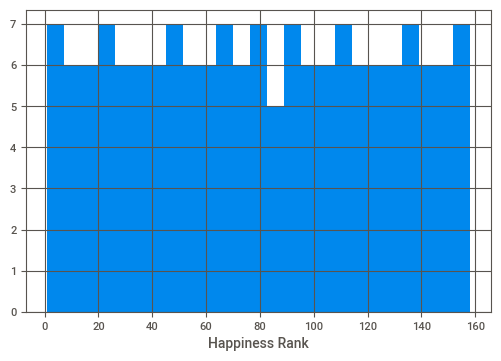

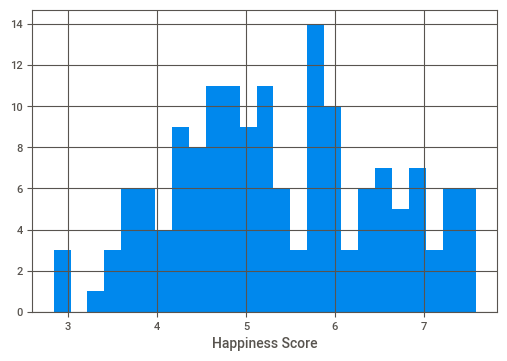

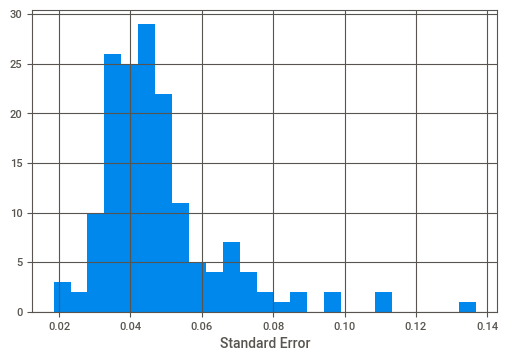

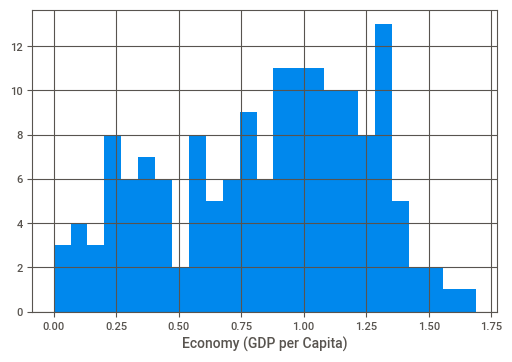

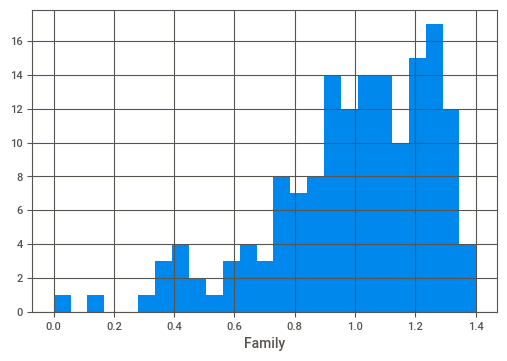

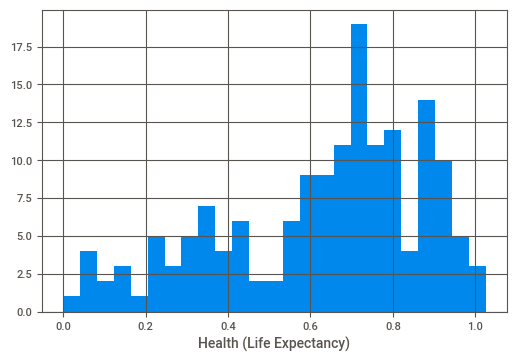

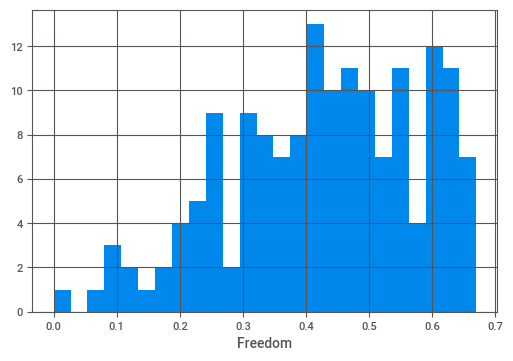

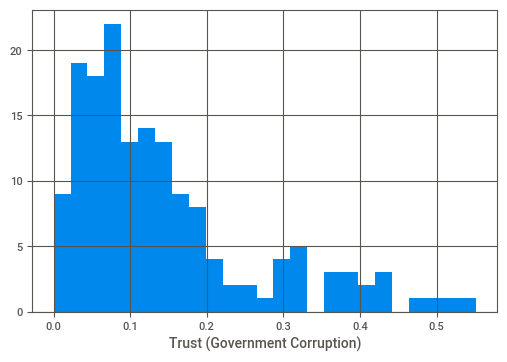

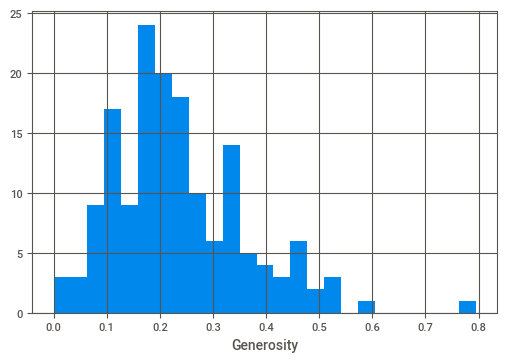

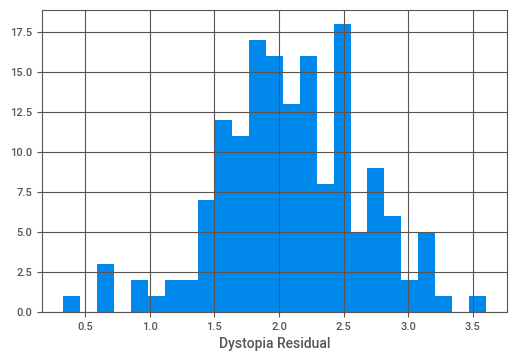

In [13]:
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.show()

In [14]:
#from above graphs we can see some of the features are right skewed which need to be treated

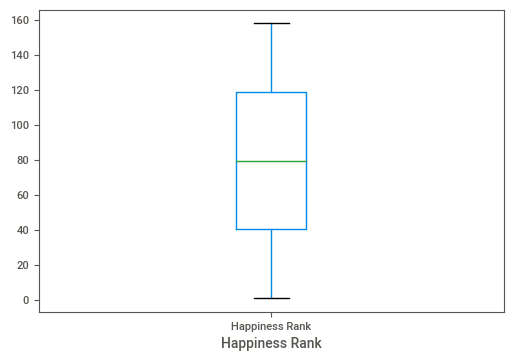

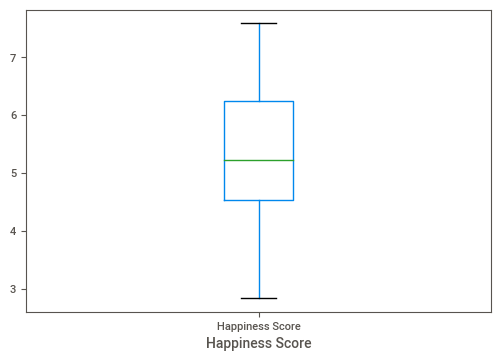

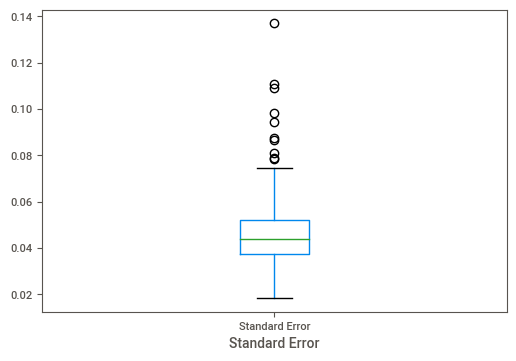

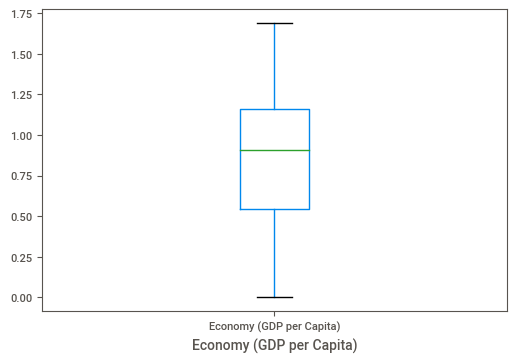

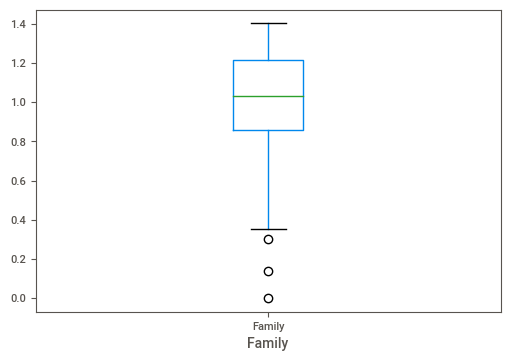

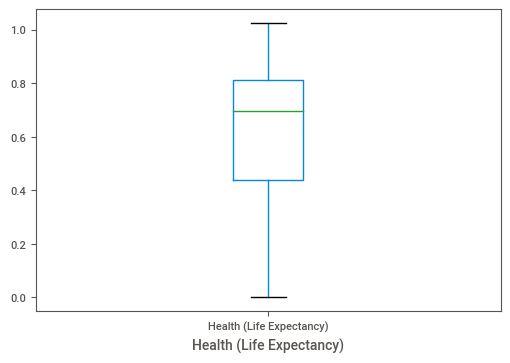

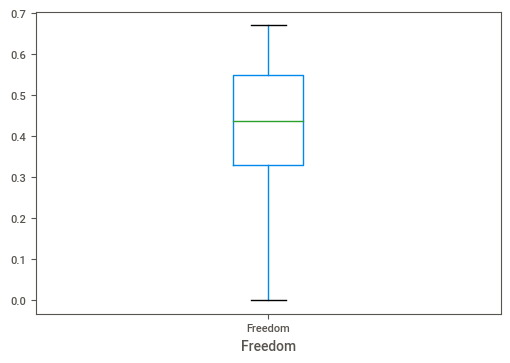

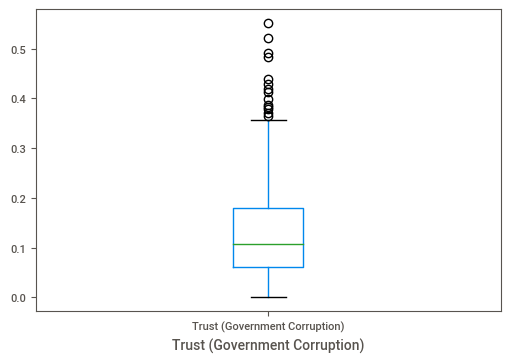

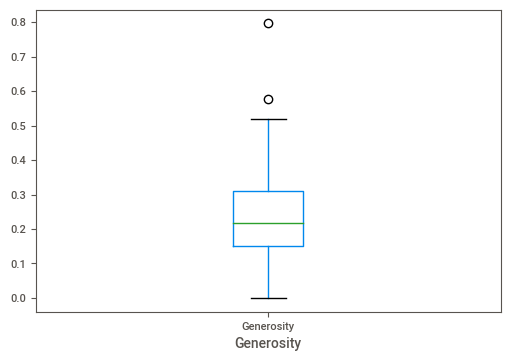

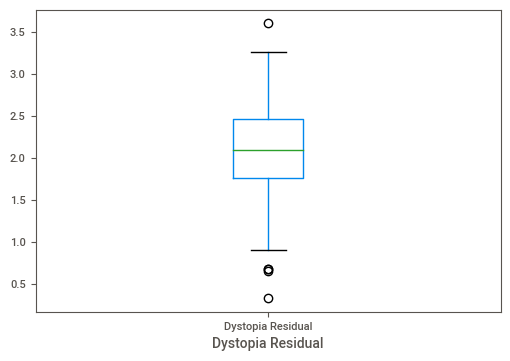

In [15]:
#checking outliers
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].plot.box()
    plt.xlabel(feature)
    plt.show()

# Bivariate Analysis

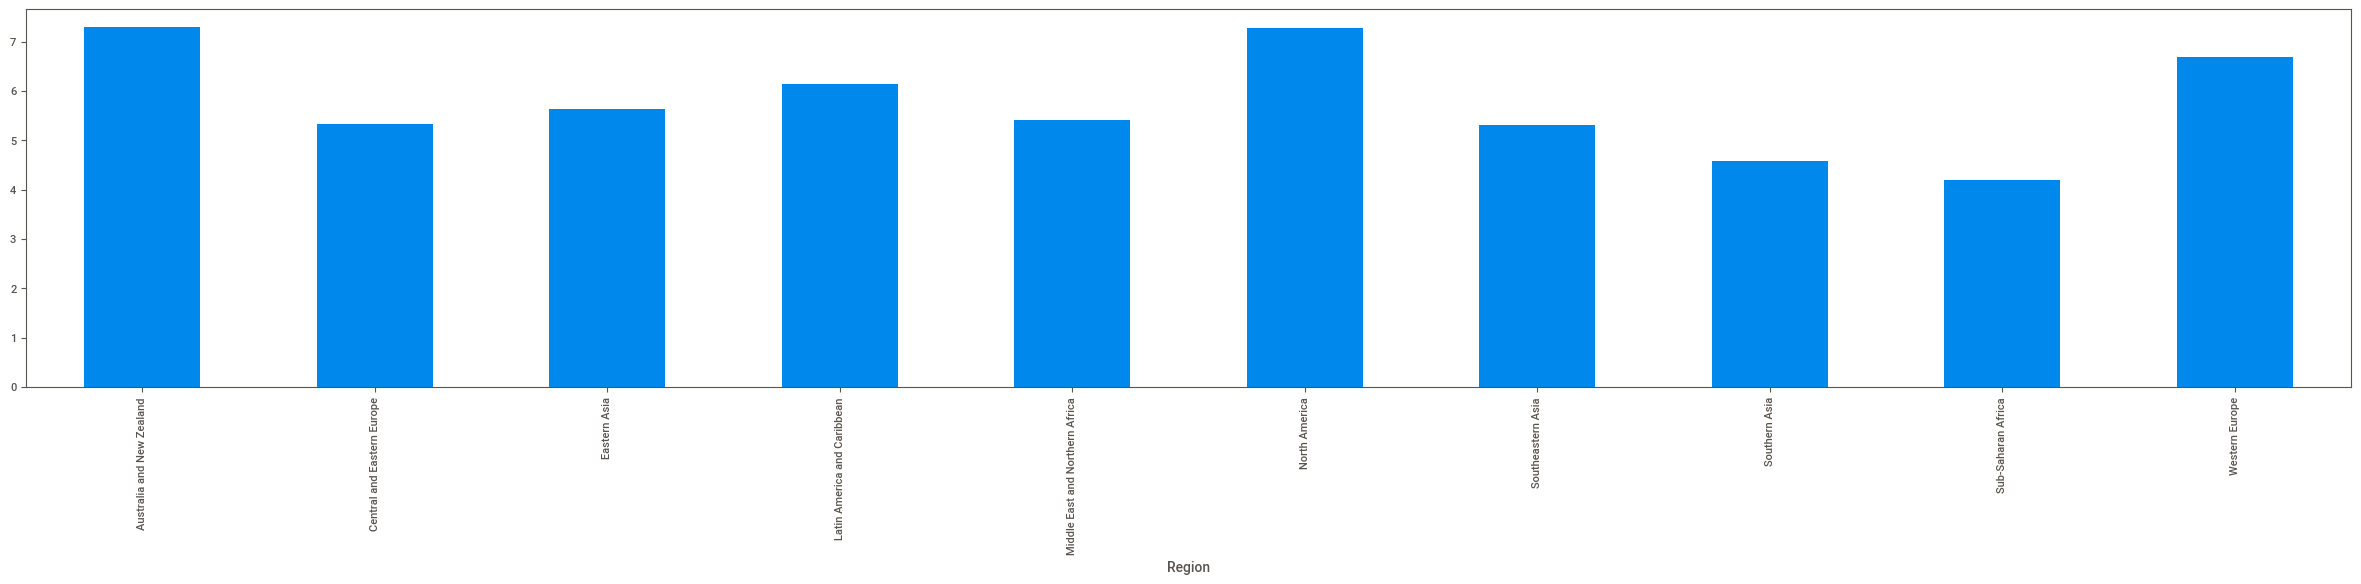

In [16]:
plt.figure(figsize=(30,5))
df.groupby(['Region'])['Happiness Score'].mean().plot.bar()
plt.show()

In [17]:
#we can see how happiness score varies from region to region
#SubSaharan Africa has the lowest happiness score

<AxesSubplot:>

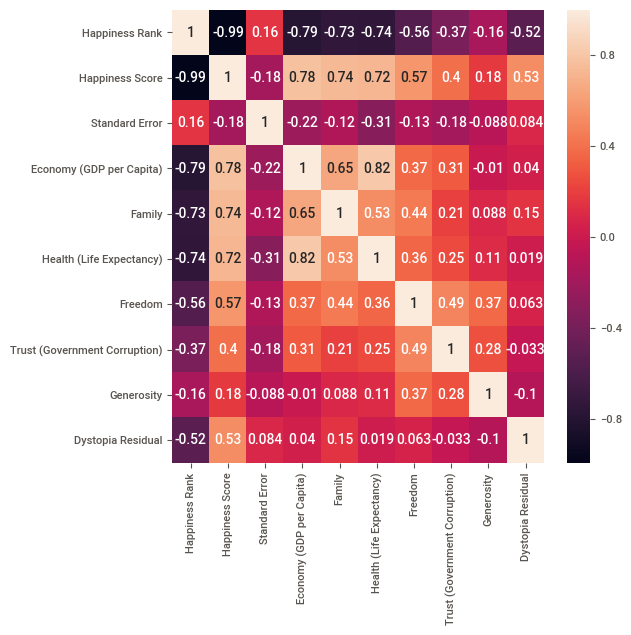

In [18]:
plt.figure(figsize=(6,6))
sns.heatmap(df.corr(),annot=True)

In [19]:
#Except Standard error and Happiness score all other variable are positively correlated to Happiness Score.

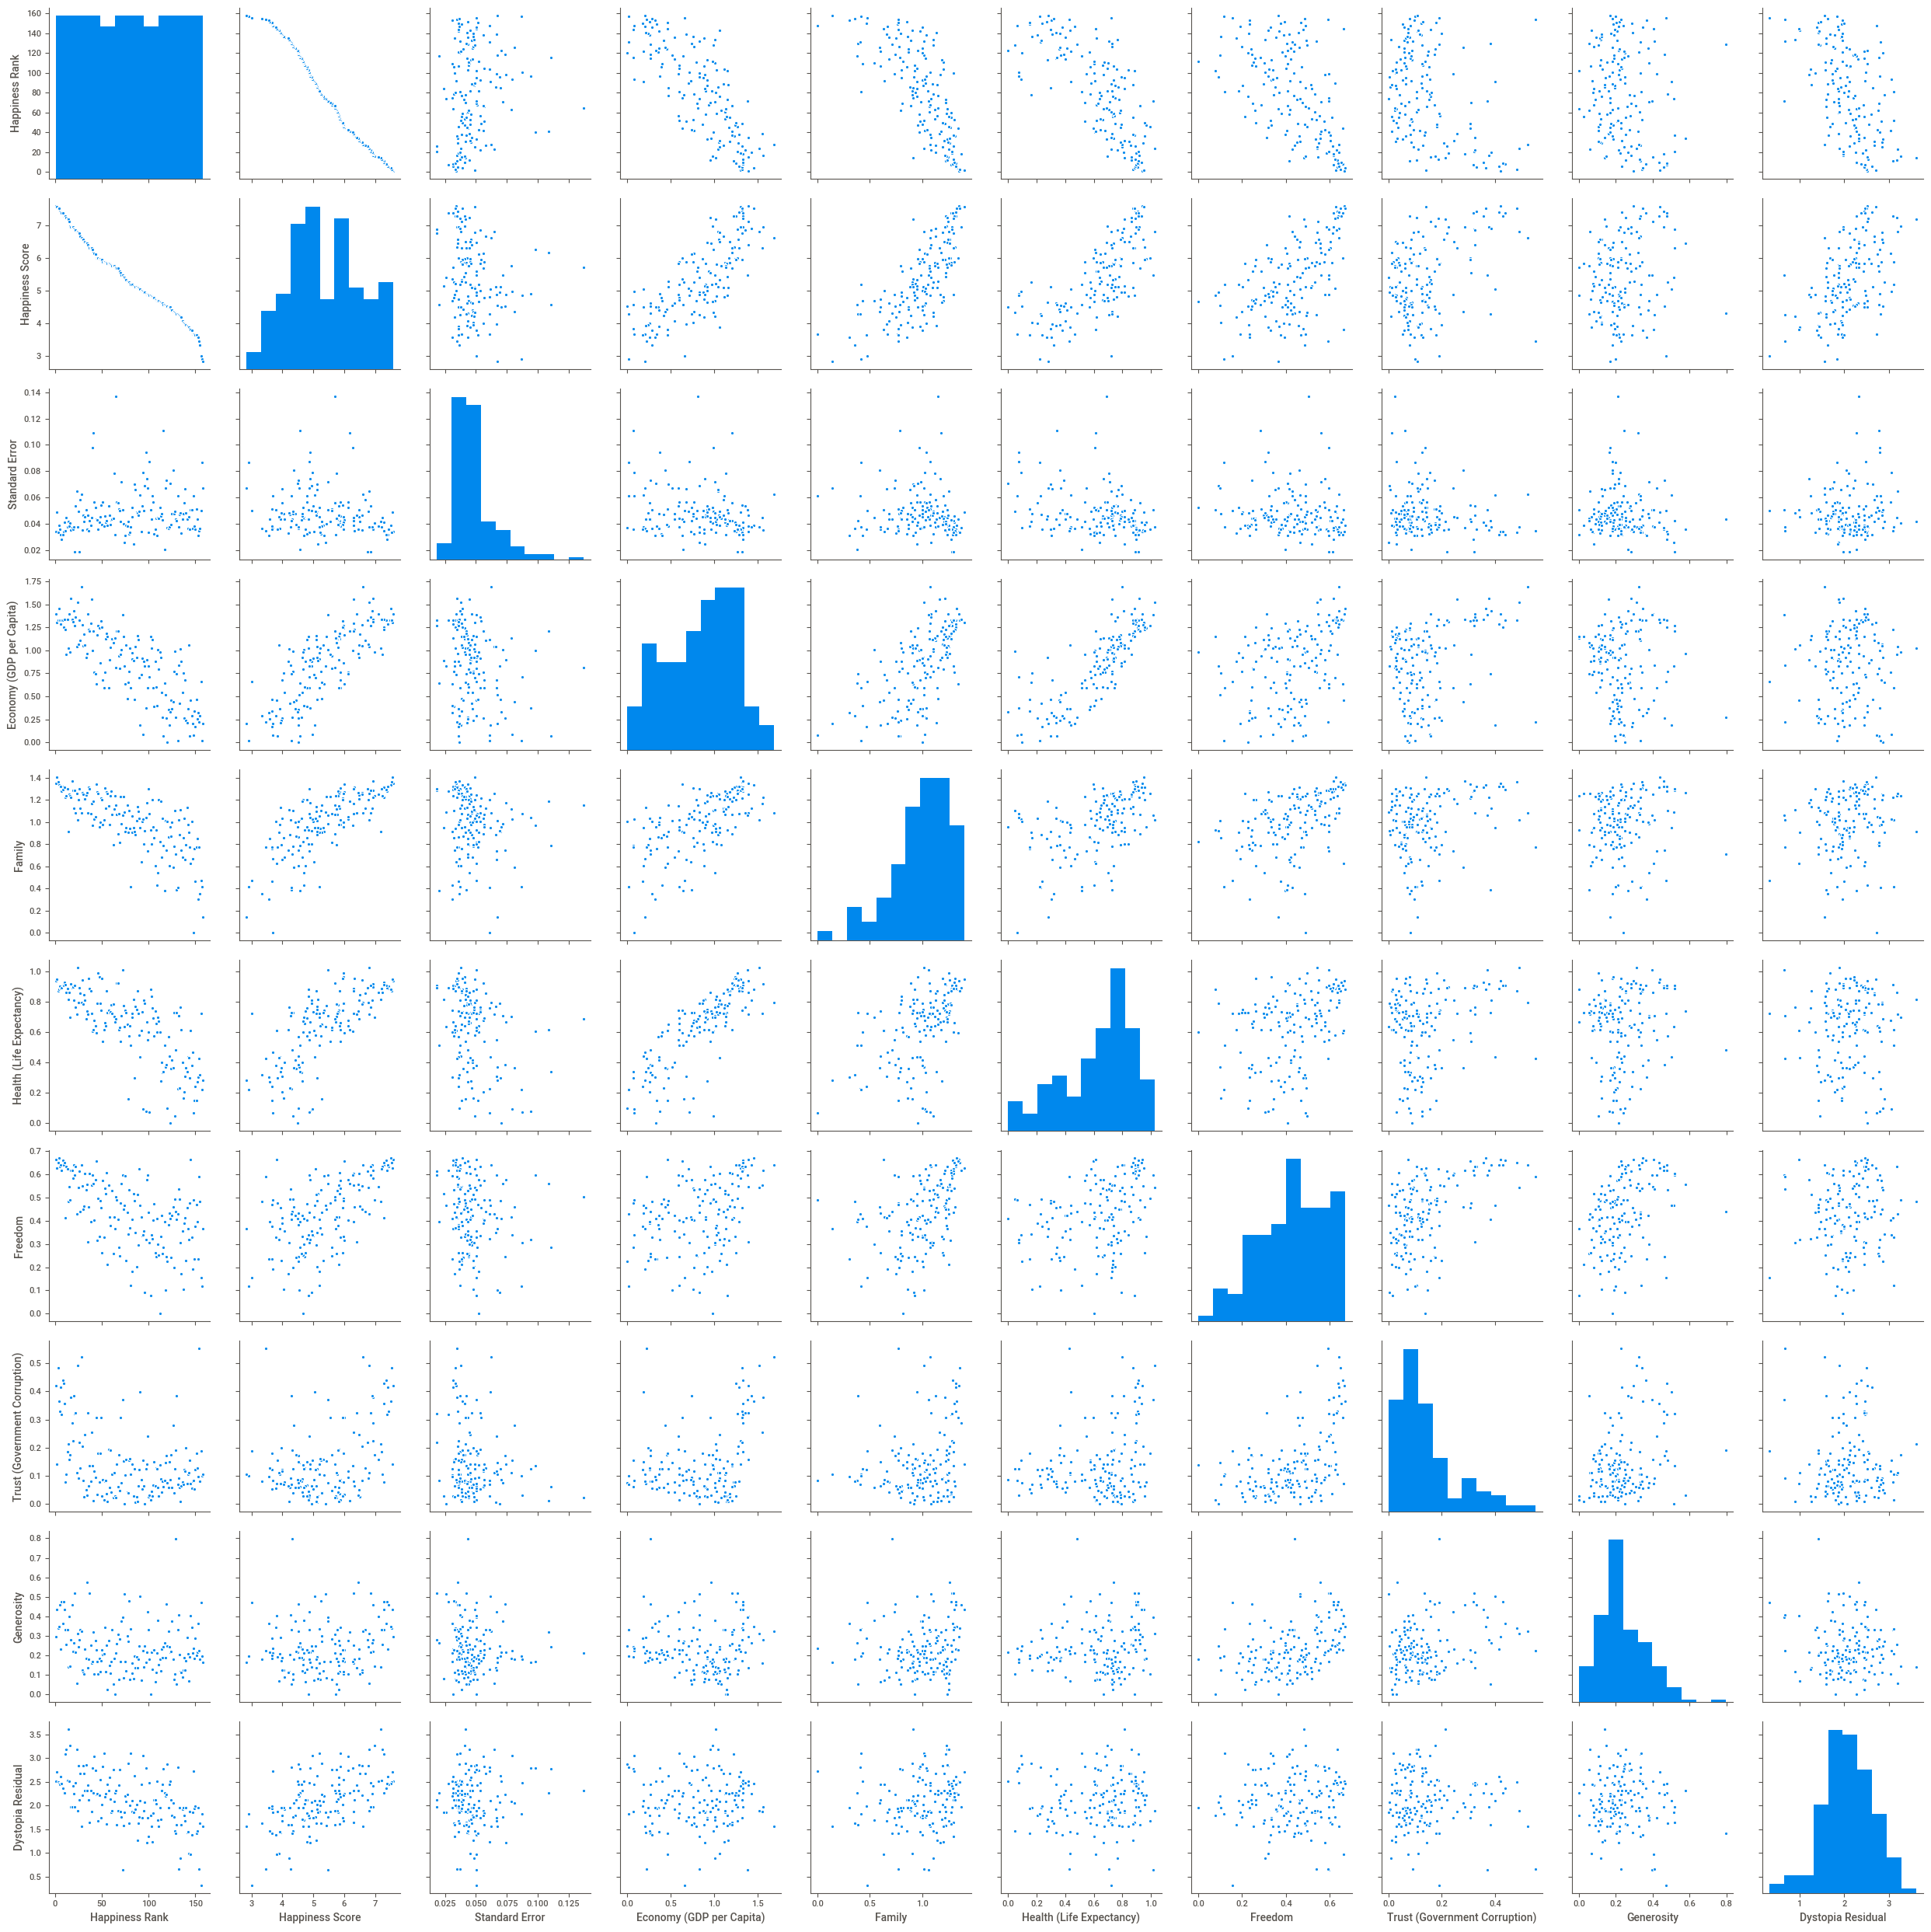

In [20]:
sns.pairplot(df)

# Feature Engineering

In [21]:
#data is skewed
#so we will use two step method to remove skewness as much as possible.
#1-->log transformations
#2-->StandarScaler

In [22]:
df.skew()

Happiness Rank                   0.000418
Happiness Score                  0.097769
Standard Error                   1.983439
Economy (GDP per Capita)        -0.317575
Family                          -1.006893
Health (Life Expectancy)        -0.705328
Freedom                         -0.413462
Trust (Government Corruption)    1.385463
Generosity                       1.001961
Dystopia Residual               -0.238911
dtype: float64

# Removing outliers by z score method

In [23]:
#Removing outliers now
from scipy.stats import zscore
z=abs(zscore(df[numerical_features]))
z.shape

(158, 10)

In [24]:
df=df[(z<3).all(axis=1)]
df.shape

(149, 12)

In [25]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.243048
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.272530
Generosity                       0.654710
Dystopia Residual               -0.021144
dtype: float64

In [26]:
# Removing skewness by log transformation method

In [27]:

for col in numerical_features:
    if df.skew().loc[col]>0.55:
        df[col]=np.log1p(df[col])
    

In [28]:
df.skew()

Happiness Rank                   0.003268
Happiness Score                  0.169740
Standard Error                   1.193808
Economy (GDP per Capita)        -0.390657
Family                          -0.811340
Health (Life Expectancy)        -0.747711
Freedom                         -0.400867
Trust (Government Corruption)    1.095190
Generosity                       0.433539
Dystopia Residual               -0.021144
dtype: float64

# Segregating target and independent variables

In [29]:
#Removing columns which are of no use for model building 
y=df[['Happiness Score']]
X=df.drop(['Happiness Score','Happiness Rank','Country','Region'],axis=1)

# Data Scaling

In [30]:
#Applying Standard scalar to independent variable only
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
X_scaled=ss.fit_transform(X)
x=pd.DataFrame(data=X_scaled,columns=X.columns)


In [31]:
x.head()

,Standard Error,Economy (GDP per Capita),Family,Health (Life Expectancy),Freedom,Trust (Government Corruption),Generosity,Dystopia Residual
0,-0.872111,1.381916,1.357879,1.235390,1.583704,2.376963,0.591975,0.756876
1,0.193583,1.138324,1.567882,1.261541,1.338953,0.058399,1.667927,1.109300
2,-0.932612,1.198220,1.401974,0.962900,1.476027,2.843958,0.948100,0.708507
3,-0.531158,1.543526,1.283947,1.006023,1.611371,1.959100,0.991966,0.657485
4,-0.768717,1.200315,1.250726,1.089333,1.366887,1.679422,1.826611,0.631620


# Model building

In [32]:
y=y
x=x

In [33]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor

In [34]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfc=RandomForestRegressor()
xgb=XGBRegressor()

In [35]:
models=[]
models.append(('KNeighborsClassifier',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfc))
models.append(('XGBRegressor',xgb))

In [36]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [37]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=4,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=mean_squared_error(y_test,pre)
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    
    
   
    

***************** KNeighborsClassifier *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.9156080632660613


cross_val_score  - -4.611938625587188


rmse_score  - 0.09607415894736848


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.9687042867418448


cross_val_score  - -2.9758298706880675


rmse_score  - 0.03562792188801727


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.999956933416954


cross_val_score  - 0.9985411856140871


rmse_score  - 4.902821175826737e-05


***************** DecisionTreeRegressor *******************


DecisionTreeRegre

In [38]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsClassifier,91.560806,0.096074,-461.193863
1,SVR,96.870429,0.035628,-297.582987
2,LinearRegression,99.995693,0.000049,99.854119
3,DecisionTreeRegressor,80.476590,0.222260,-873.189813
4,GradientBoostingRegressor,95.083486,0.055971,-271.179215
5,AdaBoostRegressor,88.519698,0.130695,-704.603867
6,RandomForestRegressor,87.130818,0.146506,-455.949277
7,XGBRegressor,91.301529,0.099026,-380.736286


In [39]:
#We can see LinearRegression is performing the best.r2 score and CV score both are above 90%
#The RMSE score is well within range for this particular problem.
#Hence we will consider LinearRegression as our final model.

In [40]:
#Now lets find the Best random_state at which  LinearRegression model performs the best.

# Finding the best random_state for Linear regression

In [41]:
def maxr2_score(model,x,y):
    max_r2=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r2:
            max_r2=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r2)
    return final_r_state

In [42]:
lr=LinearRegression()
maxr2_score(lr,x,y)

max_r2_score is at random_state   72   which is   0.9999684391160948


72

# Saving final Linear regression model

In [43]:
#From all the model tried above Linear regression  performance is best 
#corresponding random_state=81
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=81)
lr=LinearRegression()
lr.fit(x_train,y_train)
pred=lr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  0.009832425279028464
r2_score=   0.9999027530481764


In [44]:
#Cross validating the model and checking the cross_val_score.
lr=LinearRegression()
lr.fit(x_train,y_train)
cvs=cross_val_score(lr,x,y,scoring='r2',cv=4)
cvs.mean()

0.9985411856140871

In [46]:
from sklearn.externals import joblib
joblib.dump(lr,'practiceproject_17.obj')

['practiceproject_17.obj']

In [48]:
model=joblib.load('practiceproject_17.obj')
model.predict(x_test)

array([[5.71060596],
       [6.42497074],
       [6.0050172 ],
       [5.19441128],
       [7.19244397],
       [5.96787919],
       [5.00230778],
       [6.79448651],
       [5.78067839],
       [5.21110127],
       [6.30612296],
       [5.20265318],
       [7.40234179],
       [6.85890812],
       [4.27502198],
       [3.98675442],
       [4.36871179],
       [3.96159625],
       [5.80888767],
       [5.95572027],
       [6.12770995],
       [7.3540075 ],
       [7.13006975],
       [3.89223234],
       [5.59315406],
       [5.13046329],
       [5.88234724],
       [6.12707049],
       [6.68121551],
       [4.68994126],
       [4.21078262],
       [4.84545626],
       [6.49636814],
       [6.29594023],
       [4.2736611 ],
       [4.97288355],
       [4.7159232 ],
       [5.28627924]])

# Saving final predictions in file.csv

In [49]:
final_predictions=model.predict(x_test)
final_predictions=pd.DataFrame(final_predictions,columns=['Hapiness score'])

In [50]:
final_predictions.to_csv('E:\\final_predictionhapinessscore.csv',index=False)

# Conclusion:-